### Vanilla options in the Black-Scholes World

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

Our objective is to price vanilla options using various methods. We will assume no dividend payments. We price the following instruments:
- Forward: In order to validate put and call prices using Put-Call Parity.
- Vanilla call
- Vanilla put
- Digital call
- Digital put
- Zero coupon bond

We will use the following methods:
- Exact price formulas (Black-Scholes formulas) in order to benchmark our results
- Use the exact solution to the Stochastic differential equation to simulate stock prices at expiry
- Use Milstein method to simulate paths

### Exact pricing formulas

We start by defining well-known exact formulas for each instrument. We define the $d_1$ and $d_2$ terms in the Black Scholes formulas

In [47]:
def d1(init_price, rate, volatility, time, strike):

    return 1/(volatility * np.sqrt(time))*(np.log(init_price/strike) + (rate + 1/2 * volatility **2)*time)

def d2(init_price, rate, volatility, time, strike):

    return 1/(volatility * np.sqrt(time))*(np.log(init_price/strike) + (rate - 1/2 * volatility **2)*time)

In [72]:
def price_derivative(init_price, rate, volatility, time, strike, instrument = "Forward", put_or_call = "Call"):

    discount_factor = np.exp(-rate * time)

    forward_price = init_price - discount_factor * strike

    if instrument == "Forward":

        return forward_price

    elif instrument == "Vanilla":

        if put_or_call == "Call":

            price = init_price * norm.cdf(d1(init_price, rate, volatility, time, 
                                         strike)) - strike * discount_factor * norm.cdf(d2(init_price, rate, volatility, time, strike))

        if put_or_call == "Put":

            price = - init_price * norm.cdf(-1*d1(init_price, rate, volatility, time, 
                                         strike)) + strike * discount_factor * norm.cdf(-1*d2(init_price, rate, volatility, time, strike))

    return price

In [69]:
S, r, sigma, t, K = 100, 0.05, 0.20, 1, 100

In [82]:
x = np.arange(50, 150, 0.1)
exact_call_prices = np.array([price_derivative(elem, r, sigma, t, K, instrument = "Vanilla") for elem in x])
exact_put_prices = np.array([price_derivative(elem, r, sigma, t, K, instrument = "Vanilla", put_or_call = "Put") for elem in x])
forward_prices = [price_derivative(elem, r, sigma, t, K) for elem in x]

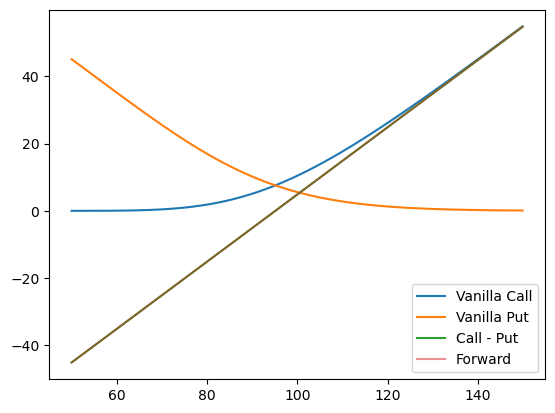

In [88]:
plt.plot(x,exact_call_prices, label = "Vanilla Call")
plt.plot(x,exact_put_prices, label = "Vanilla Put")
plt.plot(x, exact_call_prices - exact_put_prices, label = "Call - Put")
plt.plot(x, forward_prices, alpha = 0.5, label = "Forward")
plt.legend()

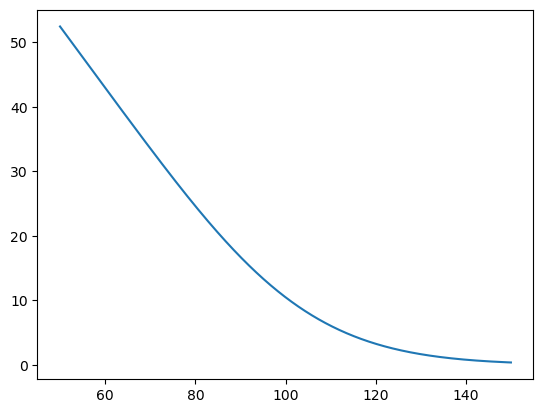

In [89]:
call_vs_strike = np.array([price_derivative(S, r, sigma, t, elem, instrument = "Vanilla") for elem in x])
plt.plot(x, call_vs_strike)